# Introduction

Goal: Discover if there is any corellation between Google searches and other values - Tesla stock price, Bitcoin price, unemployment rate.

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

Dataframe shape

In [6]:
df_tesla.shape

(124, 3)

Min/max values in the dataframe

In [7]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


Head (first 5 values)

In [8]:
df_tesla.head()

MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368

Tail (last 5 values)

In [9]:
df_tesla.tail()

MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
119  2020-05-01               16      167.000000
120  2020-06-01               17      215.962006
121  2020-07-01               24      286.152008
122  2020-08-01               23      498.320007
123  2020-09-01               31      407.339996

Descriptive statistics

In [10]:
df_tesla.describe()

TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007

### Unemployment Data

Dataframe shape

In [11]:
df_unemployment.shape

(181, 3)

Min/max values

In [12]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')
print('Smallest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100
Smallest value for "Unemployemnt Benefits" in Web Search: 14


Head

In [13]:
df_unemployment.head()

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6

Tail

In [14]:
df_unemployment.tail()

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
176  2018-09                      14     3.7
177  2018-10                      15     3.8
178  2018-11                      16     3.7
179  2018-12                      17     3.9
180  2019-01                      21     4.0

Descriptive statistics

In [15]:
df_unemployment.describe()

UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000

Month of highest search for "Unemployment Benefits"

In [16]:
df_unemployment[df_unemployment['UE_BENEFITS_WEB_SEARCH']==100]

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
61  2009-02                     100     8.3

### Bitcoin

Dataframe shapes

In [17]:
df_btc_search.shape

(73, 2)

In [18]:
df_btc_price.shape

(2204, 3)

Heads

In [19]:
df_btc_search.head()

MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5

In [20]:
df_btc_price.head()

DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0

Tails

In [21]:
df_btc_search.tail()

MONTH  BTC_NEWS_SEARCH
68  2020-05               22
69  2020-06               13
70  2020-07               14
71  2020-08               16
72  2020-09               13

In [22]:
df_btc_price.tail()

DATE         CLOSE        VOLUME
2199  2020-09-24  10745.548828  2.301754e+10
2200  2020-09-25  10702.290039  2.123255e+10
2201  2020-09-26  10754.437500  1.810501e+10
2202  2020-09-27  10774.426758  1.801688e+10
2203  2020-09-28  10912.536133  2.122653e+10

Min/max values for Bitcoin search

In [23]:
print(f'Largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')
print(f'Smallest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.min()}')

Largest BTC News Search: 100
Smallest BTC News Search: 3


Descriptive statistics for Bitcoin price

In [24]:
df_btc_price.describe()

CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10

# Data Cleaning

### Check for Missing Values

In [25]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False
Missing values for BTC price?: True


In [26]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [27]:
df_btc_price[df_btc_price.CLOSE.isna()]

DATE  CLOSE  VOLUME
2148  2020-08-04    NaN     NaN

Need to deal with NaN values -> can either impute or delete. <br>
Since there is only 1 row with NaN value, it will be deleted.

In [28]:
df_btc_price = df_btc_price.dropna()

### Datatype check

In [29]:
df_btc_price.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [30]:
df_btc_search.dtypes

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

In [31]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [32]:
df_unemployment.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

Need to convert dates from type 'object' to 'datetime' using Pandas to_datetime() function.

In [33]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Data Visualisation

### Notebook Formatting & Style Helpers

In [34]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

### Tesla Stock Price v.s. Search Volume

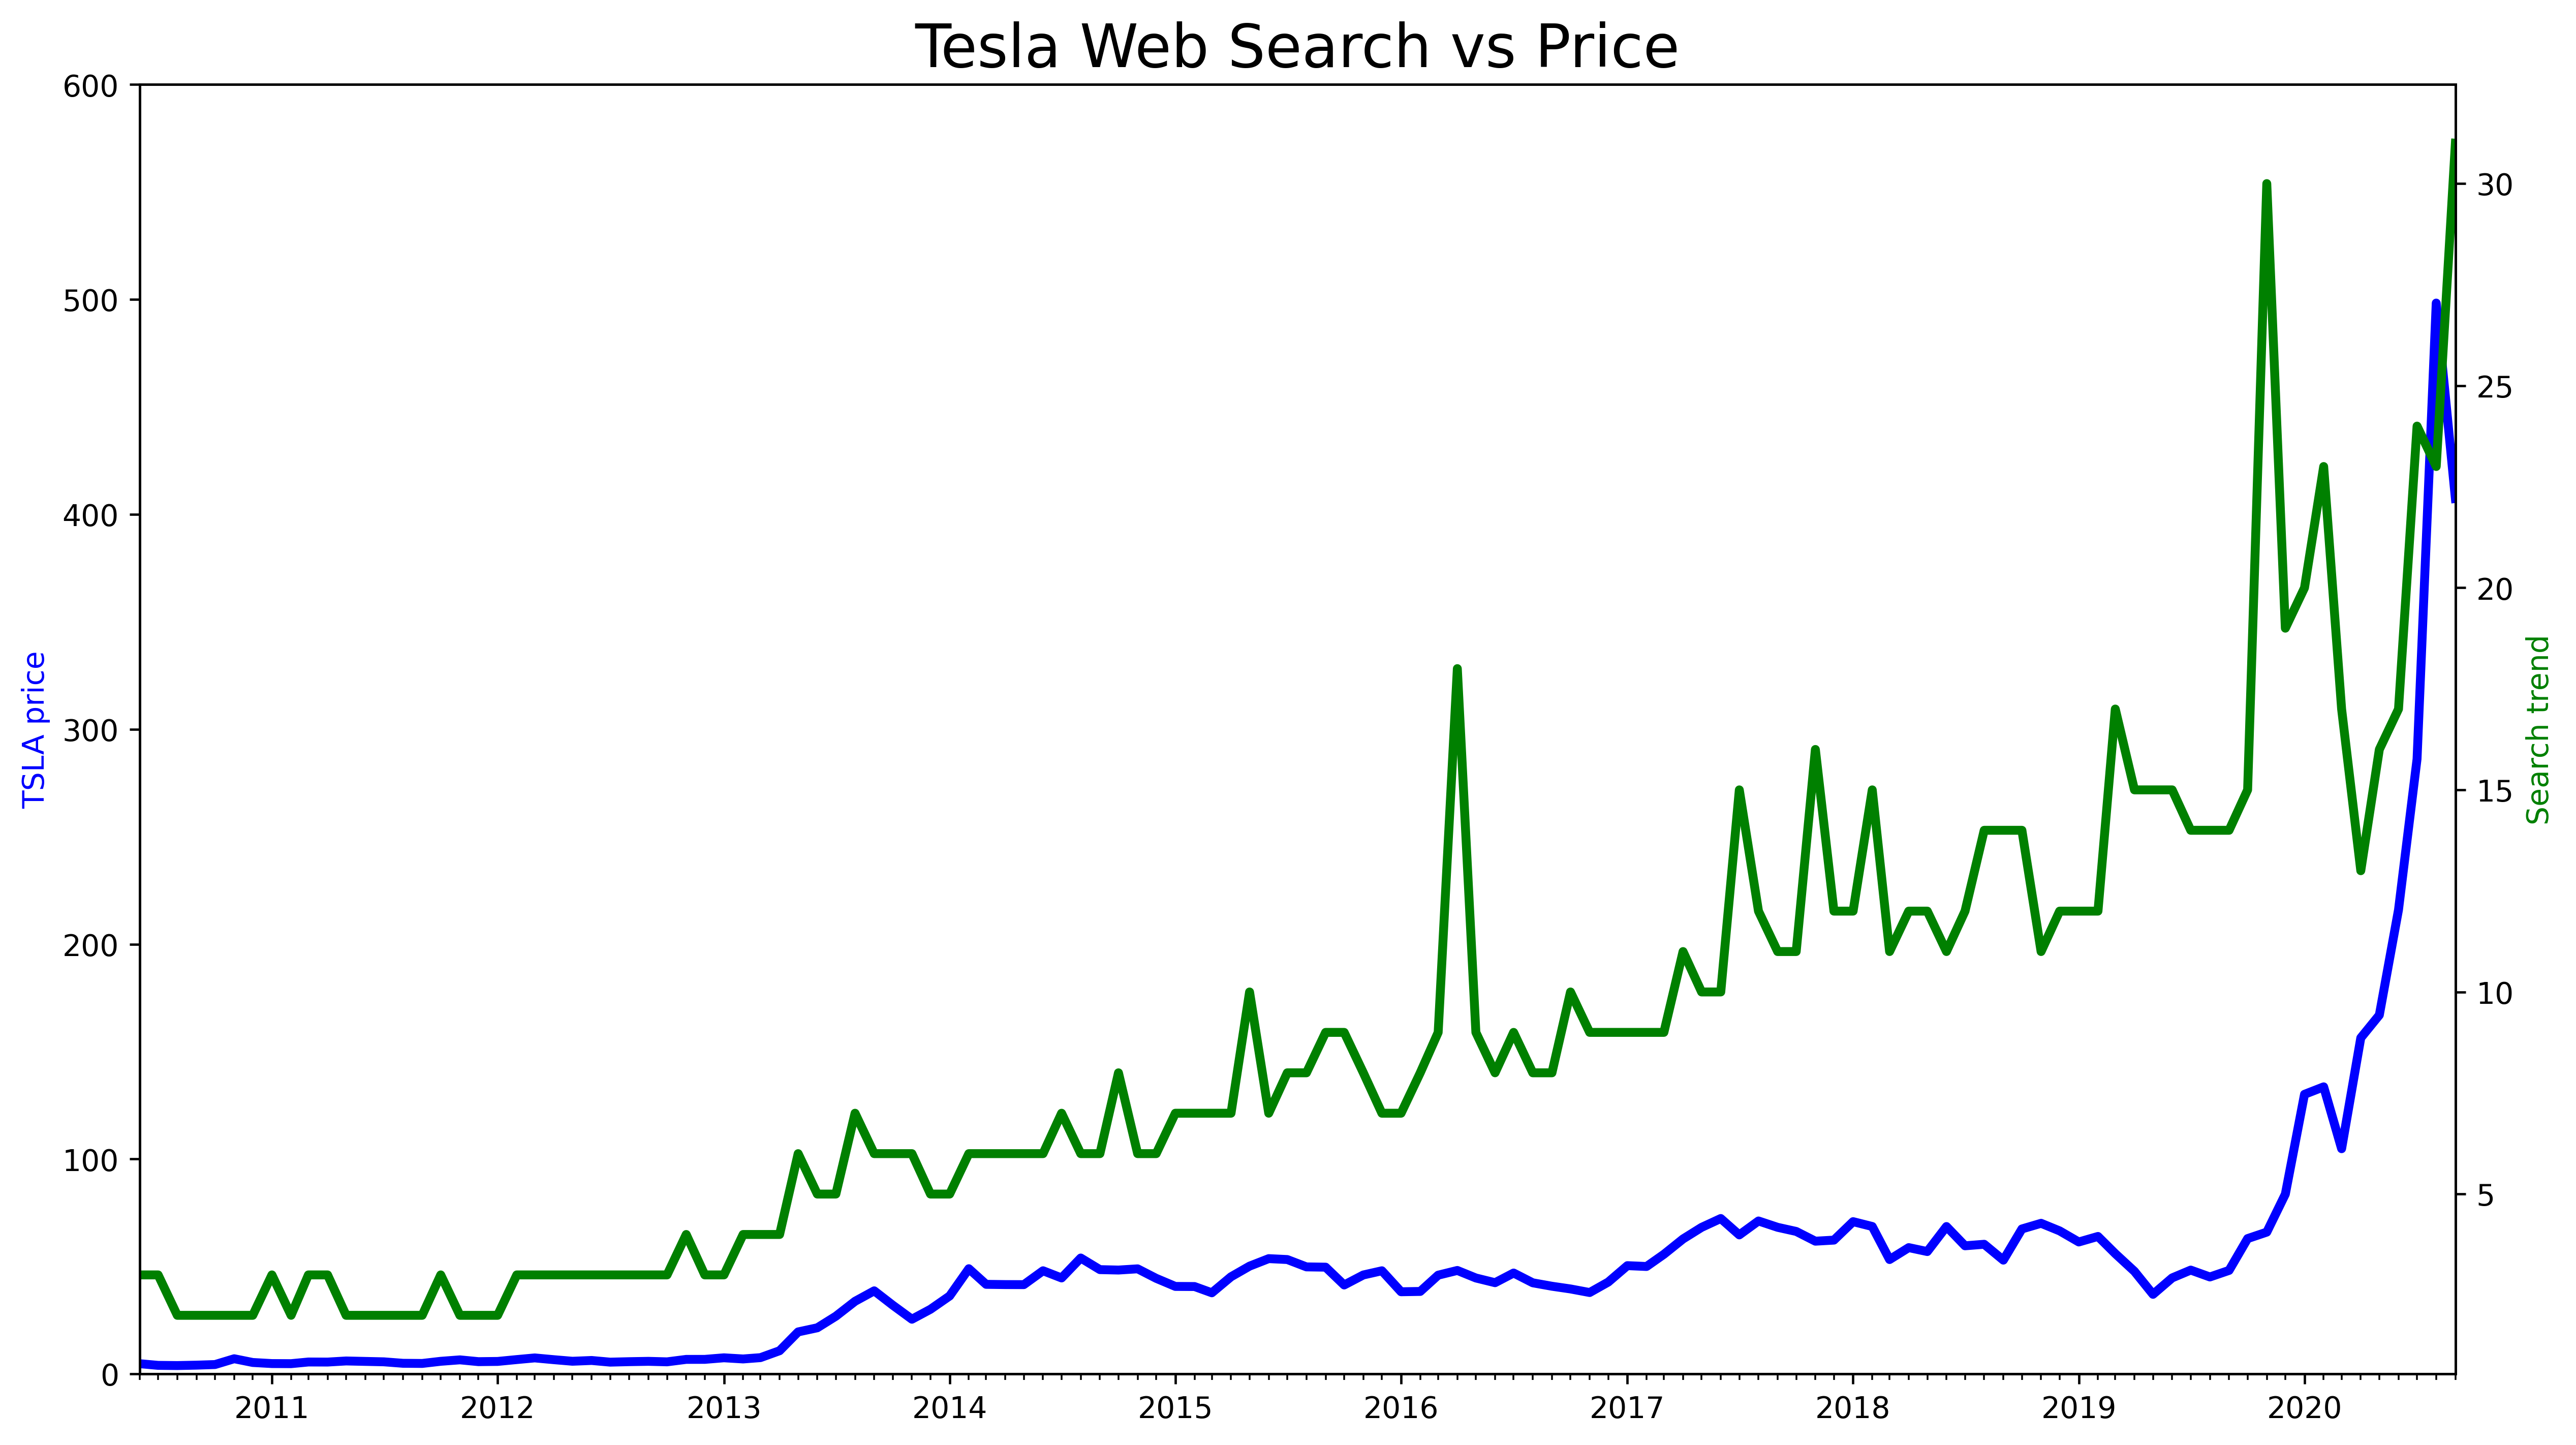

In [35]:
plt.figure(figsize=(14, 8), dpi=420)
plt.title('Tesla Web Search vs Price', fontsize=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA price', color='blue')
ax2.set_ylabel('Search trend', color='green')

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, 'b', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, 'g', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

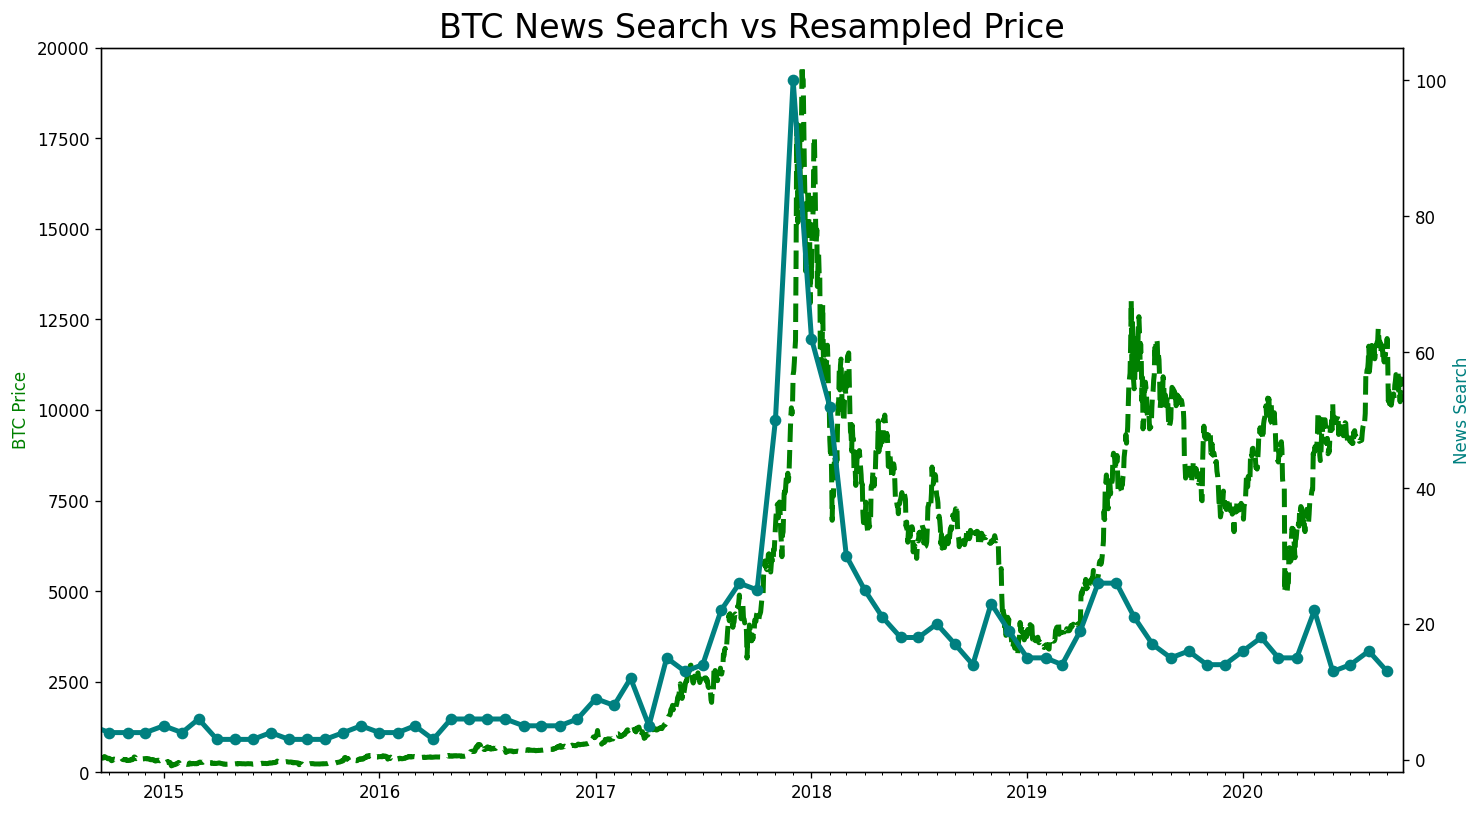

In [36]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('BTC News Search vs Resampled Price', fontsize = 20)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='green')
ax2.set_ylabel('News Search', color='teal')

ax1.set_ylim([0, 20000])
ax1.set_xlim([df_btc_price.DATE.min(), df_btc_price.DATE.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_price.DATE, df_btc_price.CLOSE, 'g', linewidth=3, linestyle='--')
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, 'teal', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

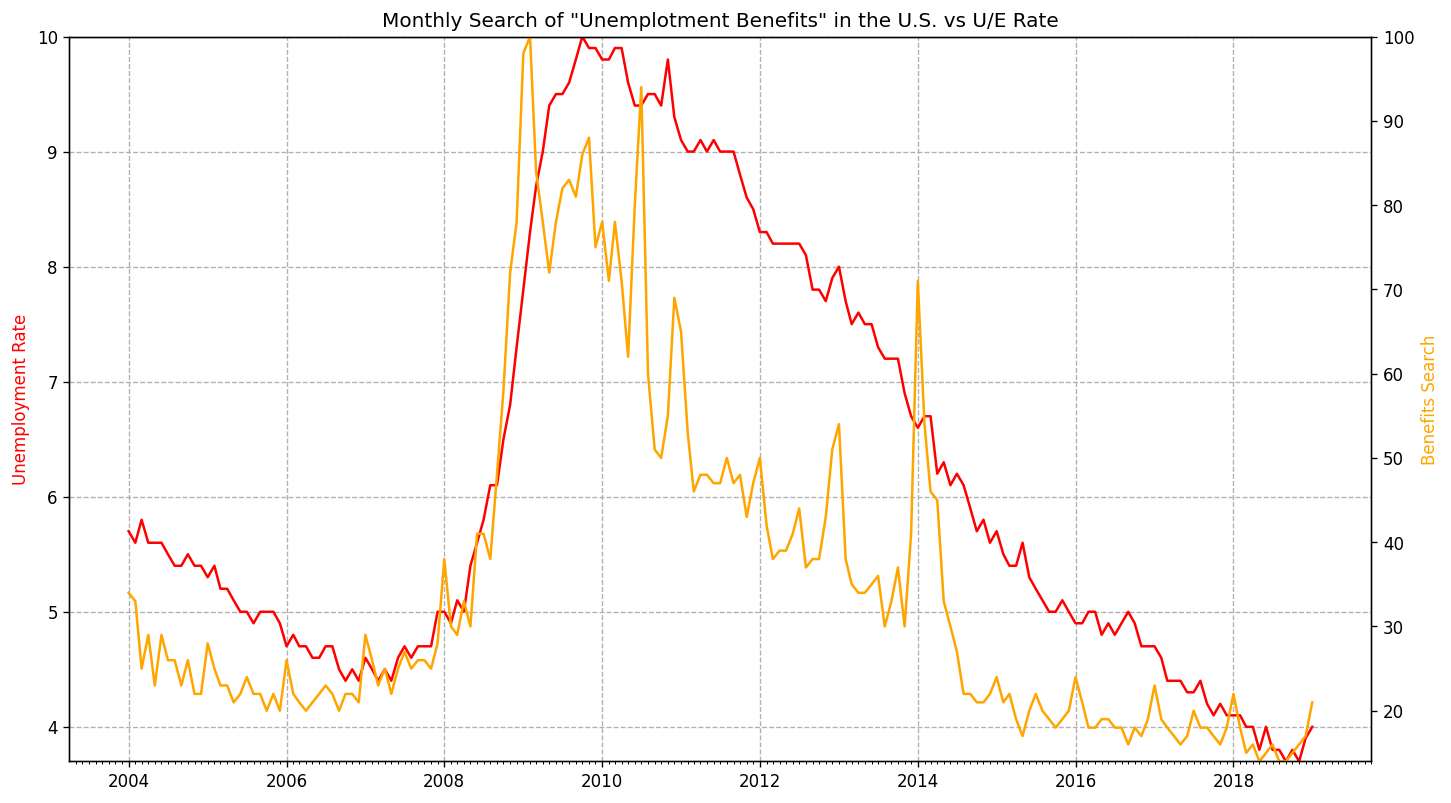

In [37]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemplotment Benefits" in the U.S. vs U/E Rate')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Unemployment Rate', color='red')
ax2.set_ylabel('Benefits Search', color='orange')

ax1.set_ylim([df_unemployment.UNRATE.min(), df_unemployment.UNRATE.max()])
ax2.set_ylim([df_unemployment.UE_BENEFITS_WEB_SEARCH.min(), df_unemployment.UE_BENEFITS_WEB_SEARCH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(b=True, which='major', axis='both', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='red')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='orange')

plt.show()

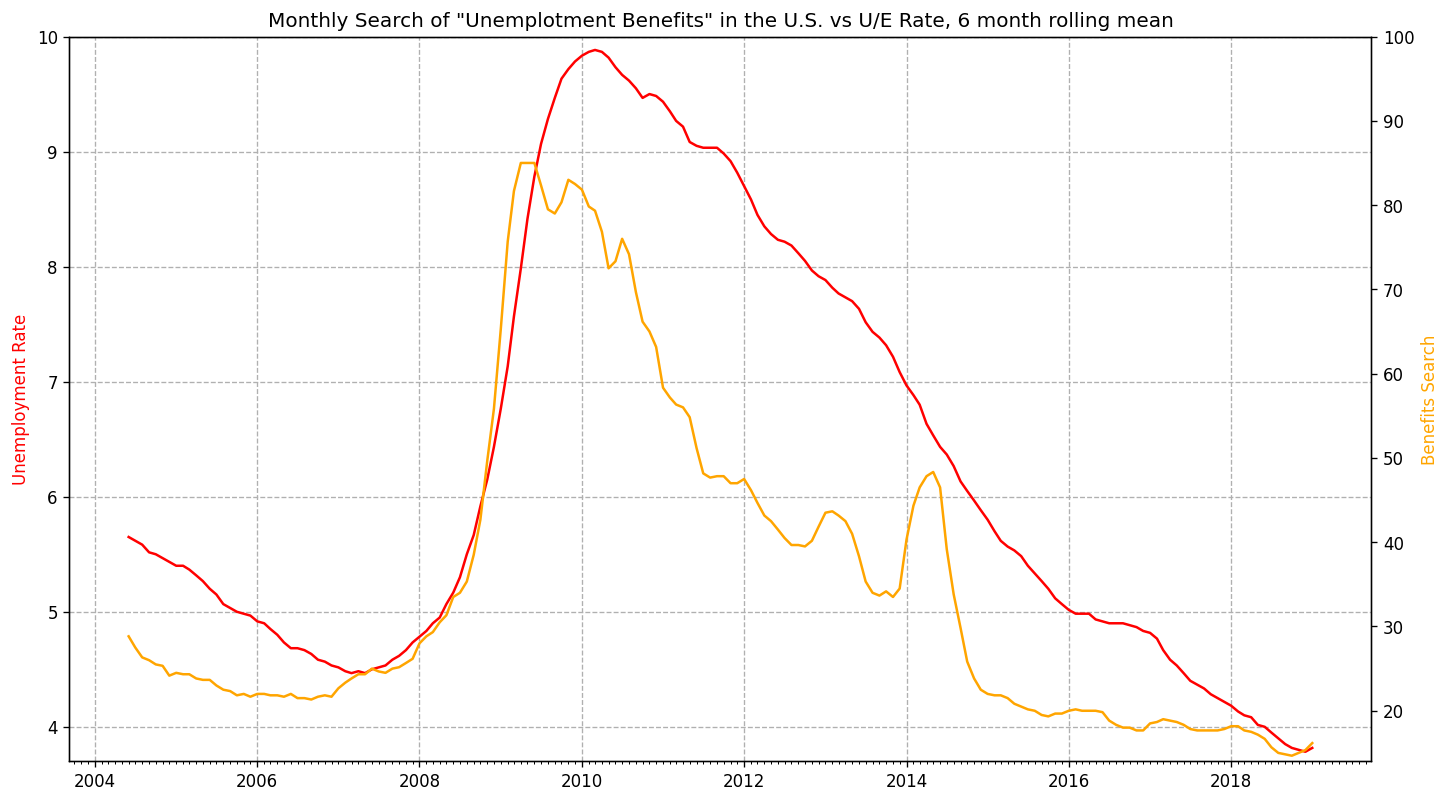

In [38]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemplotment Benefits" in the U.S. vs U/E Rate, 6 month rolling mean')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Unemployment Rate', color='red')
ax2.set_ylabel('Benefits Search', color='orange')

ax1.set_ylim([df_unemployment.UNRATE.min(), df_unemployment.UNRATE.max()])
ax2.set_ylim([df_unemployment.UE_BENEFITS_WEB_SEARCH.min(), df_unemployment.UE_BENEFITS_WEB_SEARCH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(b=True, which='major', axis='both', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE.rolling(6).mean(), color='red')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH.rolling(6).mean(), color='orange')

plt.show()

### Including 2020 in Unemployment Charts

In [39]:
df_benefits = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [40]:
df_benefits['MONTH'] = pd.to_datetime(df_benefits['MONTH'])

In [41]:
df_benefits.describe()

UE_BENEFITS_WEB_SEARCH      UNRATE
count              200.000000  200.000000
mean                10.315000    6.173000
std                 10.778061    2.128267
min                  4.000000    3.500000
25%                  5.000000    4.600000
50%                  7.000000    5.400000
75%                 12.000000    7.825000
max                100.000000   14.700000

In [42]:
df_benefits.tail()

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
195 2020-04-01                     100    14.7
196 2020-05-01                      63    13.3
197 2020-06-01                      53    11.1
198 2020-07-01                      54    10.2
199 2020-08-01                      50     8.4

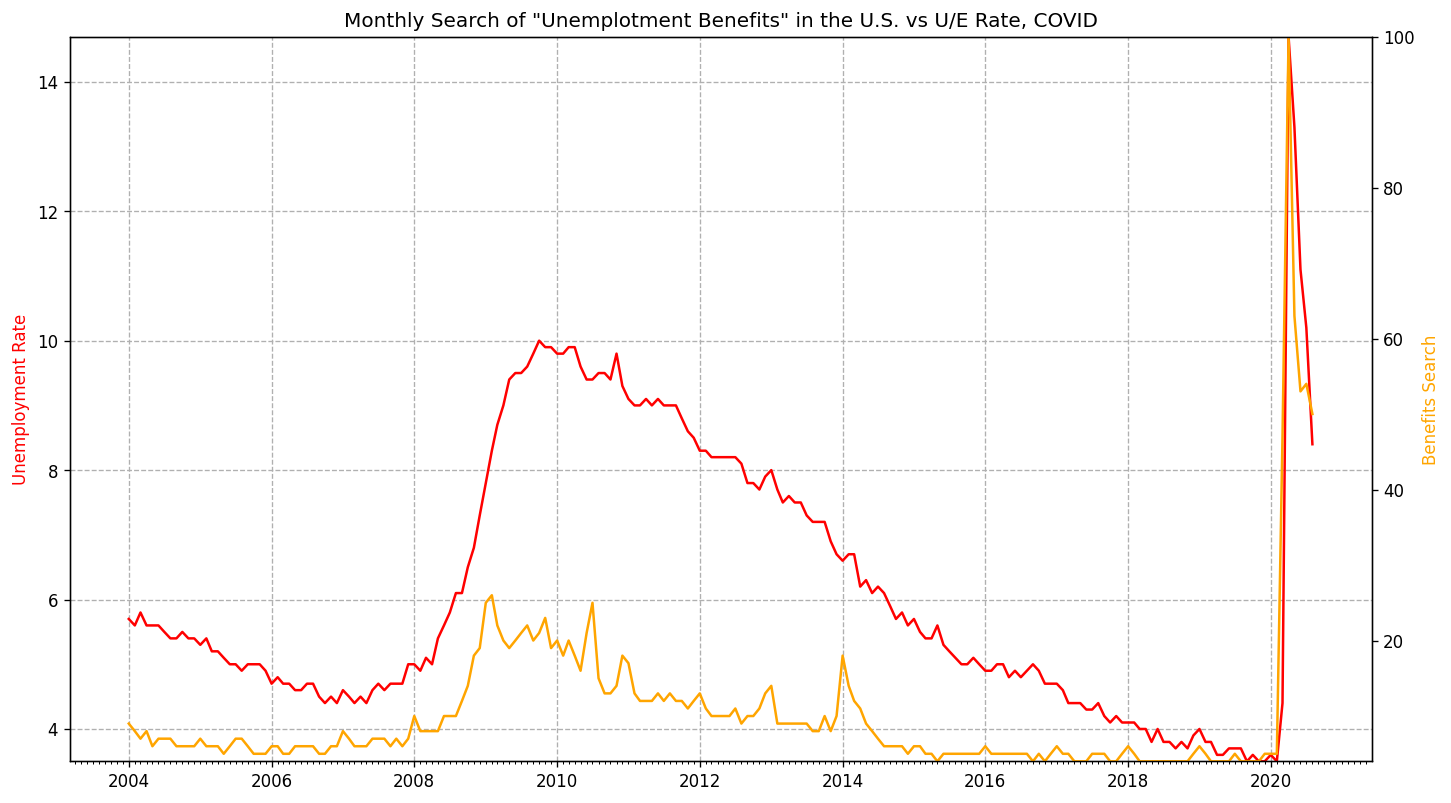

In [43]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemplotment Benefits" in the U.S. vs U/E Rate, COVID')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Unemployment Rate', color='red')
ax2.set_ylabel('Benefits Search', color='orange')

ax1.set_ylim([df_benefits.UNRATE.min(), df_benefits.UNRATE.max()])
ax2.set_ylim([df_benefits.UE_BENEFITS_WEB_SEARCH.min(), df_benefits.UE_BENEFITS_WEB_SEARCH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(b=True, which='major', axis='both', linestyle='--')

ax1.plot(df_benefits.MONTH, df_benefits.UNRATE, color='red')
ax2.plot(df_benefits.MONTH, df_benefits.UE_BENEFITS_WEB_SEARCH, color='orange')

plt.show()